# <span style="color:green">Senzo L. Nkosi
</span>

# <span style="color:blue">Health Systems Science: Assignment 4 (Decision Tree)
</span>

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## LOAD data

In [4]:
# Load the dataset
data = pd.read_csv("C:\\Users\\senzo\\OneDrive\\Desktop\\Data Science\\Health Analytics\\Practical 4\\data\\diabetic_data.csv")

data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
# missing values in each column
missing_values = data.isnull().sum()

print("Number of missing values in each column:\n", missing_values)

Number of missing values in each column:
 encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimep

In [6]:
# different kind of missing values
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [7]:
# Well, there's more kinds of missing values

print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count()) 

gender 3


## Handle missing values

In [9]:
# dropping columns with large number of missing values(the snaps)
data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)

data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
drop_Idx = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['race'][data['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(data[data['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(data.index) - set(drop_Idx))
data = data.iloc[new_Idx]



Also citoglipton and examide hav the same values hence has no effect.

In [12]:
data = data.drop(['citoglipton', 'examide'], axis = 1)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Feature Engineering

To cater for relationships between features

In [15]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

The next step covers changing of treatment to be more exact drugs. The dataset has 23 features for 23 drugs which indicate for each of these, whether a change in that treament was made or not during the current hospital stay of patient. Treatment change for diabetics upon admission has been shown by previous research to be associated with lower readmission(ask a doctor).

In [17]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin',
        'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
        'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    data[colname] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
data['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    data['numchange'] = data['numchange'] + data[colname]
    del data[colname]
    
data['numchange'].value_counts()

numchange
0    70142
1    24922
2     1271
3      106
4        5
Name: count, dtype: int64

## Data preprocessing

Encoding some variables

In [20]:
# re-encoding admission type, discharge type and admission source into fewer categories using dictionaries

admission_type_replacements = {2: 1, 7: 1, 6: 5, 8: 5}
discharge_disposition_replacements = {6: 1, 8: 1, 9: 1, 13: 1, 
                                      3: 2, 4: 2, 5: 2, 14: 2, 22: 2, 23: 2, 24: 2,
                                      12: 10, 15: 10, 16: 10, 17: 10, 
                                      25: 18, 26: 18}
admission_source_replacements = {2: 1, 3: 1, 
                                 5: 4, 6: 4, 10: 4, 22: 4, 25: 4,
                                 15: 9, 17: 9, 20: 9, 21: 9,
                                 13: 11, 14: 11}

# Apply replacements
data['admission_type_id'].replace(admission_type_replacements, inplace=True)
data['discharge_disposition_id'].replace(discharge_disposition_replacements, inplace=True)
data['admission_source_id'].replace(admission_source_replacements, inplace=True)


#  gender, race, medication change, and each of the 23 drugs

# Binary encoding
data['change'] = data['change'].map({'Ch': 1, 'No': 0})
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})

# keys is the same as before
medication_replacements = {'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1}
for col in keys:
    data[col].replace(medication_replacements, inplace=True)


# We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

# Map values to simplify A1C and glucose serum categories
a1c_replacements = {'>7': 1, '>8': 1, 'Norm': 0, 'None': -99}
glu_replacements = {'>200': 1, '>300': 1, 'Norm': 0, 'None': -99}

data['A1Cresult'] = data['A1Cresult'].map(a1c_replacements)
data['max_glu_serum'] = data['max_glu_serum'].map(glu_replacements)


# Age
# Encode age ranges
age_mapping = {f'[{10*i}-{10*(i+1)})': i+1 for i in range(10)}
data['age'] = data['age'].replace(age_mapping)

data['age'].value_counts()

C:\Users\senzo\AppData\Local\Temp\ipykernel_29512\59428864.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['admission_type_id'].replace(admission_type_replacements, inplace=True)
C:\Users\senzo\AppData\Local\Temp\ipykernel_29512\59428864.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64

## Data Visualization

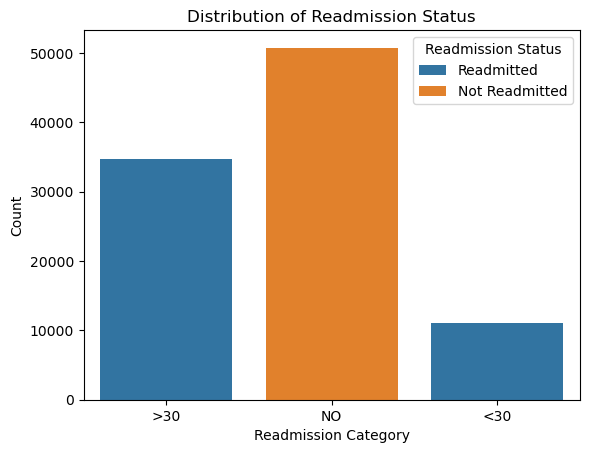

In [22]:
# Create a new column for readmission status
data['readmission_status'] = data['readmitted'].apply(lambda x: 'Readmitted' if x != 'NO' else 'Not Readmitted')

# Plot the countplot with hue
sns.countplot(x='readmitted', hue='readmission_status', data=data).set_title('Distribution of Readmission Status')
plt.xlabel('Readmission Category')
plt.ylabel('Count')
plt.legend(title='Readmission Status')
plt.show()

C:\Users\senzo\AppData\Local\Temp\ipykernel_29512\2870306278.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['readmission_status'] == 'Not Readmitted', 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')
C:\Users\senzo\AppData\Local\Temp\ipykernel_29512\2870306278.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['readmission_status'] == 'Readmitted', 'time_in_hospital'], color='r', shade=True, label='Readmitted')


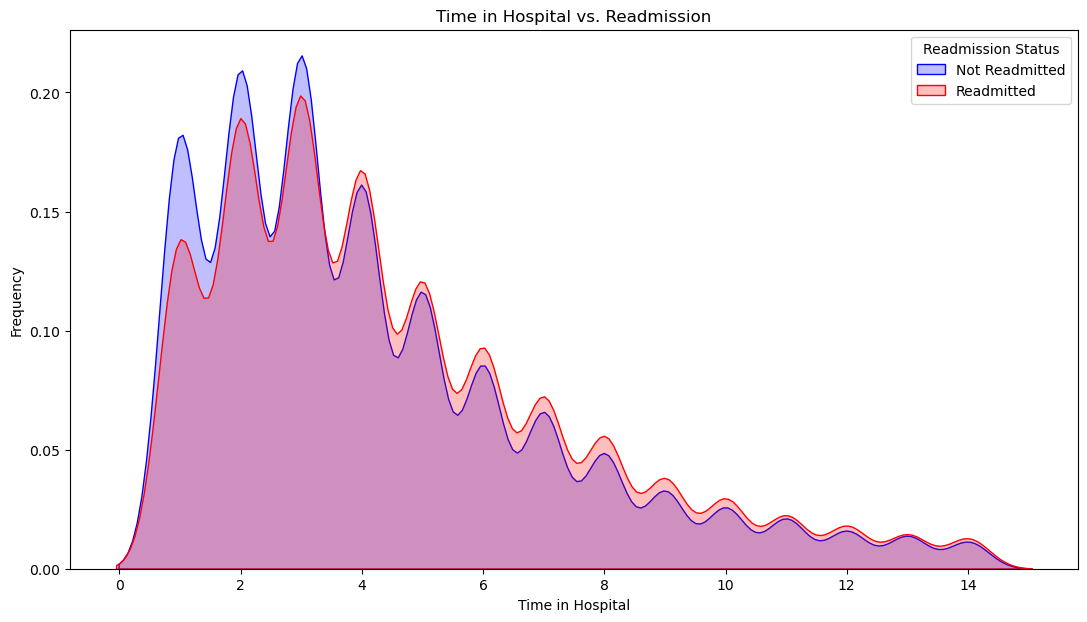

In [23]:
fig = plt.figure(figsize=(13, 7))

# KDE plot for 'Not Readmitted'
sns.kdeplot(data.loc[data['readmission_status'] == 'Not Readmitted', 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')

# KDE plot for 'Readmitted'
sns.kdeplot(data.loc[data['readmission_status'] == 'Readmitted', 'time_in_hospital'], color='r', shade=True, label='Readmitted')

# Set labels and title
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency')
plt.title('Time in Hospital vs. Readmission')
plt.legend(title='Readmission Status')

# Show plot
plt.show()

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

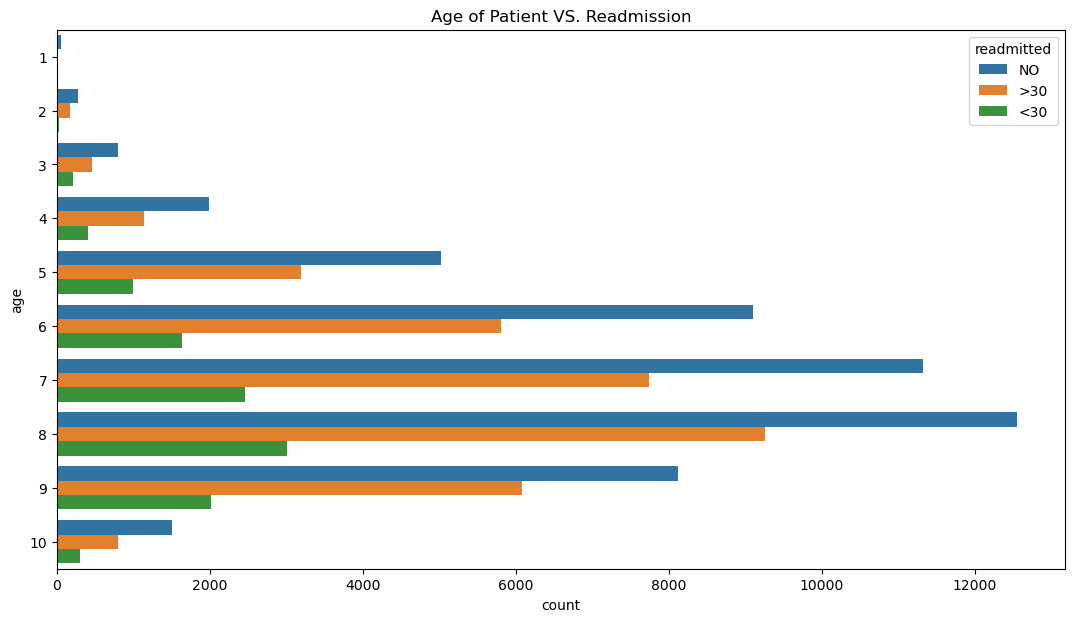

In [24]:
fig = plt.figure(figsize=(13, 7))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

<Axes: xlabel='count', ylabel='race'>

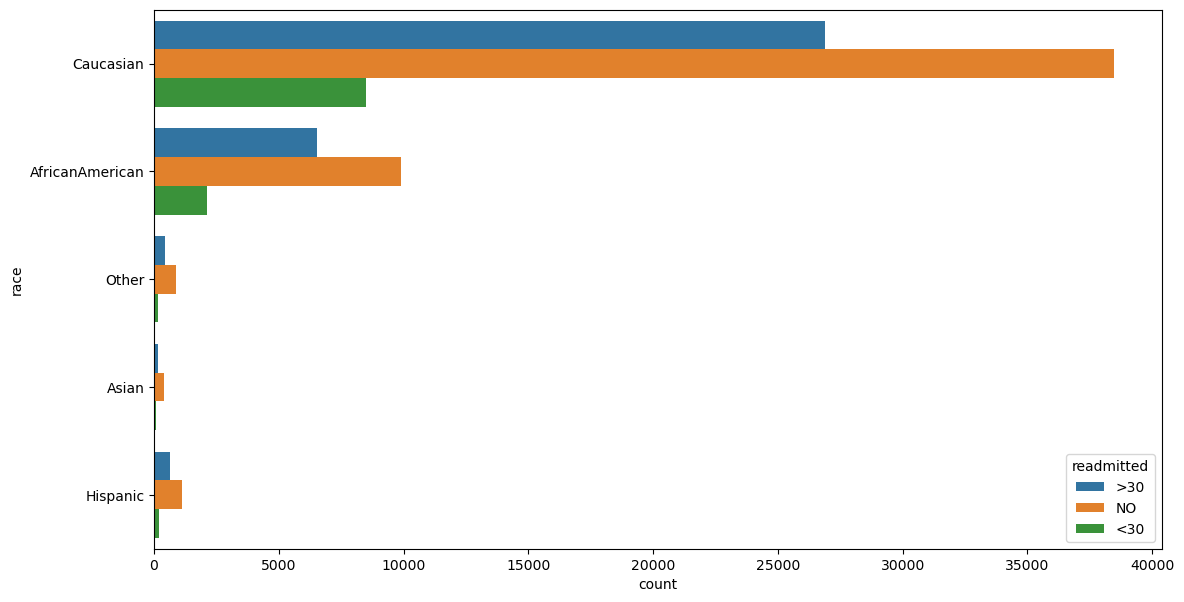

In [25]:
fig = plt.figure(figsize=(13, 7))
sns.countplot(y = data['race'], hue = data['readmitted'])

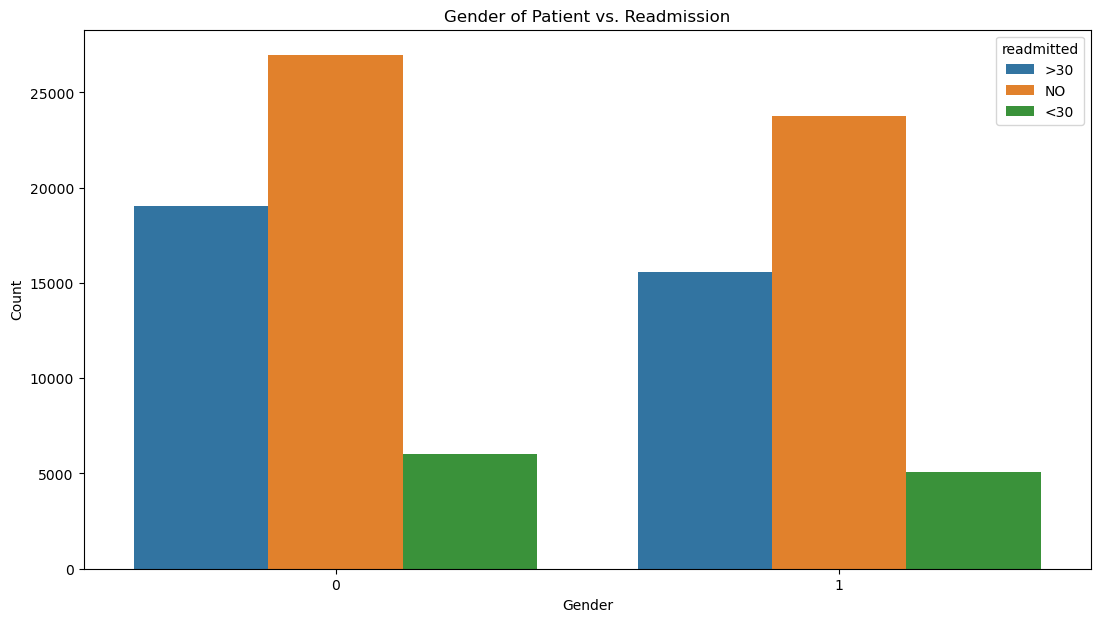

In [26]:
fig = plt.figure(figsize=(13, 7))
sns.countplot(x='gender', hue='readmitted', data=data).set_title("Gender of Patient vs. Readmission")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Separate the target variable

In [28]:
data['readmission_status']

1             Readmitted
2         Not Readmitted
3         Not Readmitted
4         Not Readmitted
5             Readmitted
               ...      
101761        Readmitted
101762    Not Readmitted
101763    Not Readmitted
101764    Not Readmitted
101765    Not Readmitted
Name: readmission_status, Length: 96446, dtype: object

In [29]:
# Convert 'readmission_status' to a numerical target (0 or 1)
data['readmission_status'] = data['readmission_status'].map({'Not Readmitted': 0, 'Readmitted': 1})
data['readmission_status']

1         1
2         0
3         0
4         0
5         1
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmission_status, Length: 96446, dtype: int64

In [30]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange,readmission_status
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,0,0,0,0,1,1,>30,0,1,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,1,NO,3,0,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,0,0,0,0,1,1,NO,0,1,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,0,0,0,0,1,1,NO,0,0,0
5,35754,82637451,Caucasian,1,6,1,1,1,3,31,...,0,0,0,0,0,1,>30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,8,1,2,7,3,51,...,0,0,0,0,1,1,>30,0,1,1
101762,443847782,74694222,AfricanAmerican,0,9,1,2,4,5,33,...,0,0,0,0,0,1,NO,1,0,0
101763,443854148,41088789,Caucasian,1,8,1,1,7,1,53,...,0,0,0,0,1,1,NO,1,1,0
101764,443857166,31693671,Caucasian,0,9,1,2,7,10,45,...,0,0,0,0,1,1,NO,1,1,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96446 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              96446 non-null  int64  
 1   patient_nbr               96446 non-null  int64  
 2   race                      96446 non-null  object 
 3   gender                    96446 non-null  int64  
 4   age                       96446 non-null  int64  
 5   admission_type_id         96446 non-null  int64  
 6   discharge_disposition_id  96446 non-null  int64  
 7   admission_source_id       96446 non-null  int64  
 8   time_in_hospital          96446 non-null  int64  
 9   num_lab_procedures        96446 non-null  int64  
 10  num_procedures            96446 non-null  int64  
 11  num_medications           96446 non-null  int64  
 12  number_outpatient         96446 non-null  int64  
 13  number_emergency          96446 non-null  int64  
 14  number_inp

In [32]:
# If you don't want to modify the diagnostic columns, just ensure they're treated as numeric.
data['diag_1'] = pd.to_numeric(data['diag_1'], errors='coerce')  # Converts to numeric, coercing errors to NaN if necessary
data['diag_2'] = pd.to_numeric(data['diag_2'], errors='coerce')
data['diag_3'] = pd.to_numeric(data['diag_3'], errors='coerce')


In [33]:
data['readmission_status']

1         1
2         0
3         0
4         0
5         1
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmission_status, Length: 96446, dtype: int64

In [34]:
# Find the column that contains the string 'Caucasian'
data = data.drop(['race'], axis = 1)

matching_columns = data.columns[data.apply(lambda x: x.astype(str).str.contains('Caucasian', na=False)).any()]

if matching_columns.empty:
    print("No column contains the string 'Caucasian'")
else:
    # Display the rows where 'Caucasian' appears
    for column in matching_columns:
        print(f"Values in column '{column}' that contain 'Caucasian':")
        print(data[data[column].astype(str).str.contains('Caucasian', na=False)][column])


No column contains the string 'Caucasian'


In [35]:
# Drop rows with missing target values (if any)
data = data.dropna(subset=['readmission_status'])

# Select feature columns (all columns except the target column)
feature_columns = data.drop(columns=['readmission_status', 'encounter_id', 'patient_nbr', 'readmitted'])

# We are using 'readmission_status' as the target variable
X = feature_columns
y = data['readmission_status']


# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Evaluate the Model

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.57      0.57     10021
           1       0.53      0.52      0.53      9269

    accuracy                           0.55     19290
   macro avg       0.55      0.55      0.55     19290
weighted avg       0.55      0.55      0.55     19290

Confusion Matrix:
[[5697 4324]
 [4417 4852]]
